In [1]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

image_dir = '../data/d2s_images_v1/images'
annotations_dir = '../data/d2s_annotations_v1.1/annotations'

annotation_file = f'{annotations_dir}/D2S_training.json'

coco = COCO(annotation_file)

classes = coco.loadCats(coco.getCatIds())

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


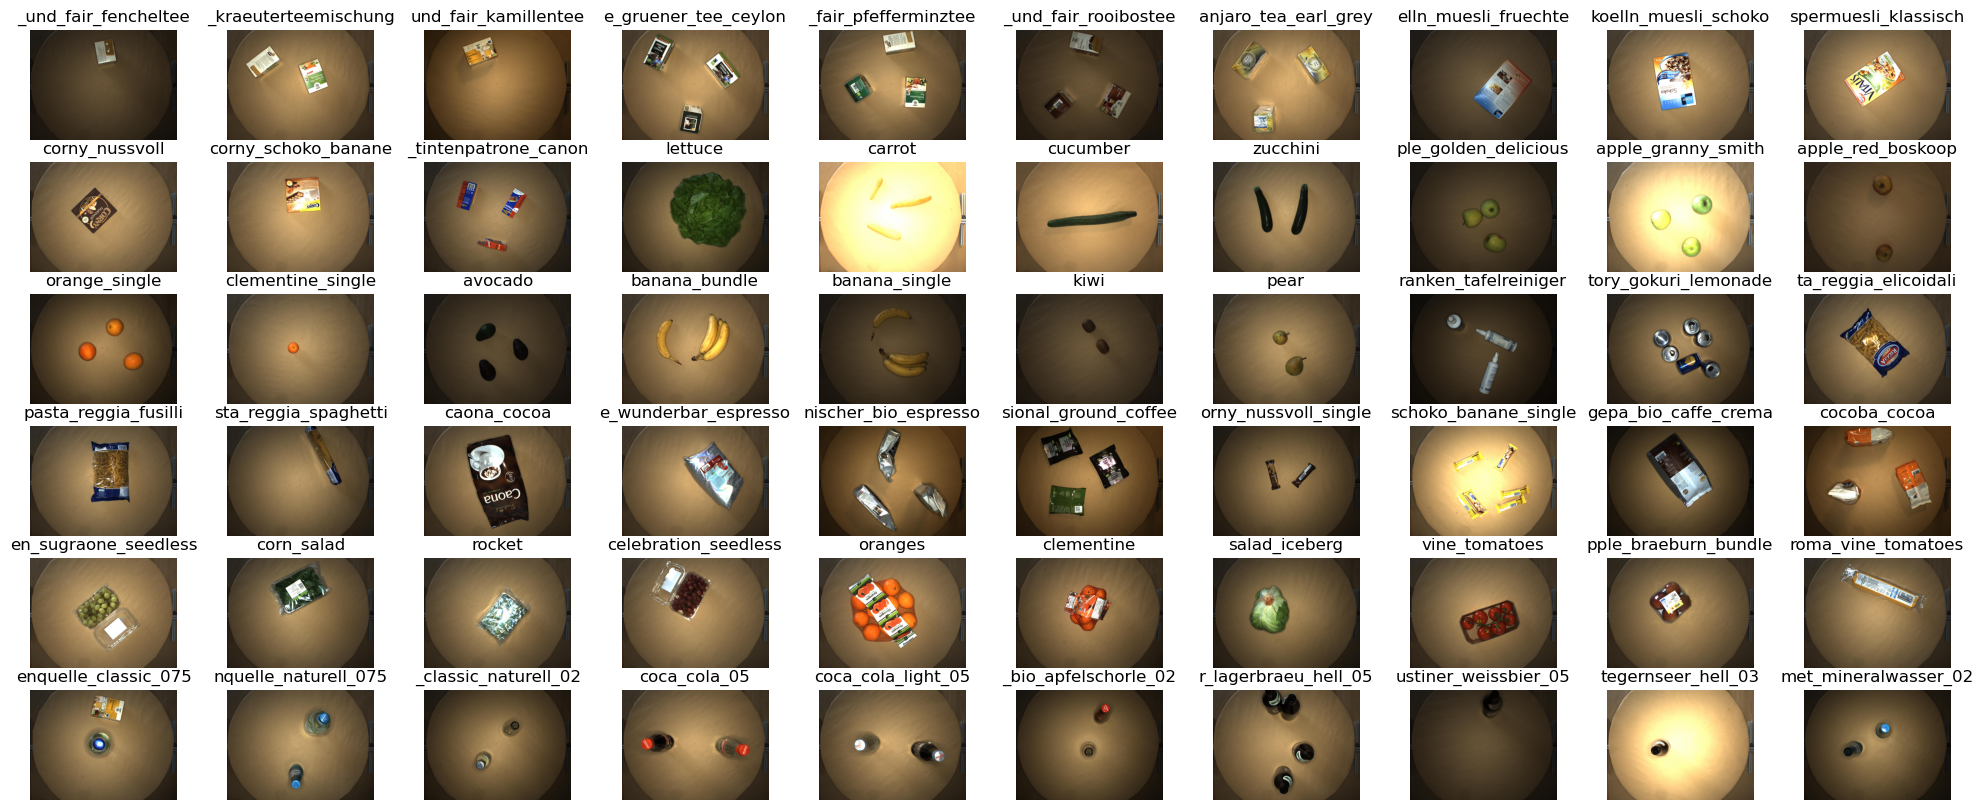

In [2]:
rows, cols = 6, 10
fig, axes = plt.subplots(rows, cols, figsize=(25, 10))

for i, cat in enumerate(classes):
    c = 0
    img_ids = coco.getImgIds(catIds=cat['id'])
    ann_ids = coco.getAnnIds(imgIds=img_ids)
    classes_in_image = set([coco.loadAnns(ann_id)[0]['category_id'] for ann_id in ann_ids])
    if len(classes_in_image) > 1:
        for img_id in img_ids[:1]:
            c += 1
            ann_ids = coco.getAnnIds(imgIds=img_id)
            classes_in_image = set([coco.loadAnns(ann_id)[0]['category_id'] for ann_id in ann_ids])
            if len(classes_in_image) == 1:
                break;


    img_id = img_ids[c]
    img_info = coco.loadImgs(img_id)[0]
    img_path = f'{image_dir}/{img_info["file_name"]}'
    img = Image.open(img_path)

    ax = axes[i // cols, i % cols]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(cat['name'][-20:])

plt.show()
